#### **Background and Context:**

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

#### **Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

##### **Dataset:**

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
-airline                                                                   
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

##### **Import libraries, load dataset, print shape of data, data description**

In [2]:
#setting random seed to get repeatable results
import numpy as np
import os
import random
import tensorflow as tf

# Seed value
seed_value = 0
#Set the PYTHONHASHSEED environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)
#Set the numpy pseudo-random generator at a fixed value
np.random.seed(seed_value)
#Set the python built-in pseudo-random generator at a fixed value
random.seed(seed_value)
#Set the tensorflow pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)
#for GPU
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [3]:
#Install and import necessary libraries

!pip install contractions

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Import regex, string and unicodedata
import re, string, unicodedata
#Import contractions library
import contractions
#Import BeautifulSoup
from bs4 import BeautifulSoup
#Import numpy
import numpy as np
#Import pandas                                     
import pandas as pd
#Import Natural Language Tool Kit                               
import nltk                                             

#Download Stopwords
nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')

#Import stopwords
from nltk.corpus import stopwords
#Import Tokenizer                 
from nltk.tokenize import word_tokenize
#Import Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
#Import plt for visualization       
import matplotlib.pyplot as plt
#Import wordcloud
import wordcloud
#Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Import TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Import Preprocessing
from sklearn import preprocessing
#Import train_test_split
from sklearn.model_selection import train_test_split
#Import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Import cross_val_score
from sklearn.model_selection import cross_val_score
#Import metrics
from sklearn import metrics
#Import confusion_matrix
from sklearn.metrics import confusion_matrix
#Import seaborn
import seaborn as sns
#Import Counter
from collections import Counter
#Import class weight
from sklearn.utils import class_weight
#Import Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#Import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

     |████████████████████████████████| 286kB 10.1MB/s 
     |████████████████████████████████| 327kB 29.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85400 sha256=d33ac73f2ad8c30176fbbb630840bcf7f271c8090c3079158f108382fbc4cef8
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load the data from csv file
data = pd.read_csv('drive/My Drive/Tweets.csv')

In [6]:
#print the shape of data
data.shape

(14640, 15)

- This dataset has 15 columns and 14640 rows

In [7]:
#checking first 5 rows from the dataset
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
#checking last 5 rows from the dataset
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


- From first and last 5 records, we can see that 'airline_sentiment' feature has positive, negative and neutral values. This is our target variable for classification.

- There are lot of NULL or missing values (NaN) in the dataset

- 'text' is the column where the comments are stored and we should be analysing this field for sentiment analysis

- 'text' and 'airline_sentiment' are the fields that have direct impact on sentiment analysis

- But the feature 'airline' along with 'airline_sentiment' can give insights on % of  positive, negative and neutral sentiments for each airline

In [9]:
#checking for null values
data.isnull().sum(axis=0).sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_created                       0
text                                0
retweet_count                       0
name                                0
airline                             0
airline_sentiment_confidence        0
airline_sentiment                   0
tweet_id                            0
dtype: int64

- We can see that the following columns have null or missing values
    - negativereason_gold
    - airline_sentiment_gold
    - tweet_coord
    - negativereason
    - user_timezone
    - tweet_location
    - negativereason_confidence

- Since we are going to need only 2 columns for this analysis (text and airline_sentiment) and both these columns have no null values, we can leave the rest of the data and not treat nulls

In [10]:
#Checking data types and number of non-null values for each column using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- This again shows that there are 7 columns that have null values, since the total record count (14640) is not matching these 7 columns non-null record count
    
    - negativereason_gold
    - airline_sentiment_gold
    - tweet_coord
    - negativereason
    - user_timezone
    - tweet_location
    - negativereason_confidence

In [11]:
#checking duplicate records in the entire dataset
data.duplicated().sum()

36

- There are 36 duplicate records when the entire dataset is considered.

##### Summary of the dataset

In [12]:
#Since our analysis is centered around 2 columns, we will see those 2 columns only
data[['text','airline_sentiment']].describe().T

,count,unique,top,freq
text,14640,14427,@united thanks,6
airline_sentiment,14640,3,negative,9178


- This shows that the most frequent sentiment is "negative"
- It also shows the most common comment
- Both columns have 0 null values
- Sentiment column has 3 unique values

In [13]:
#checking value_count for airline_sentiment field
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

- Negative sentiment has more data than neutral and positive sentiments

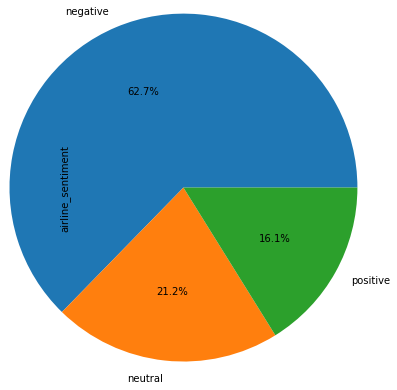

In [14]:
#pie plot showing how the data is distributed between 3 sentiment labels
data.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.1f%%',radius=2);

- Negative sentiment is 62.7% whereas neutral is 21.2% and positive is 16.1% only

In [15]:
#Showing % of sentiment data for each airline
pd.crosstab(data['airline'],data['airline_sentiment'],normalize='index')

airline_sentiment,negative,neutral,positive
airline,,,
American,0.710402,0.167814,0.121783
Delta,0.429793,0.325383,0.244824
Southwest,0.490083,0.274380,0.235537
US Airways,0.776862,0.130793,0.092345
United,0.688906,0.182365,0.128728
Virgin America,0.359127,0.339286,0.301587


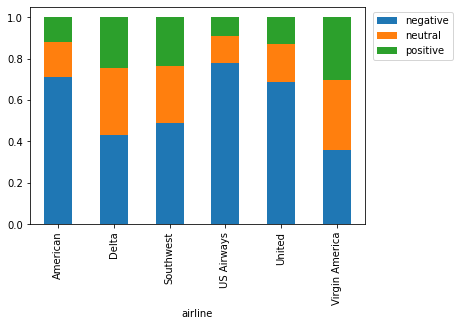

In [16]:
#Showing % of sentiment data for each airline in stacked bar plot
pd.crosstab(data['airline'],data['airline_sentiment'],normalize='index').plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left');

- This shows how the % of negative, neutral and positive sentiments for each of the airline

- Negative sentiment is significantly high for all airlines except Virgin America

- For Virgin America, all three categories of sentiment have almost equal data points 

In [17]:
#Split the sentiment labels by airline
pd.crosstab(data['airline_sentiment'],data['airline'],normalize='index')

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,0.213554,0.104053,0.129222,0.246568,0.286882,0.019721
neutral,0.149403,0.233301,0.214263,0.122943,0.224911,0.055179
positive,0.142192,0.230216,0.241219,0.113838,0.208210,0.064325


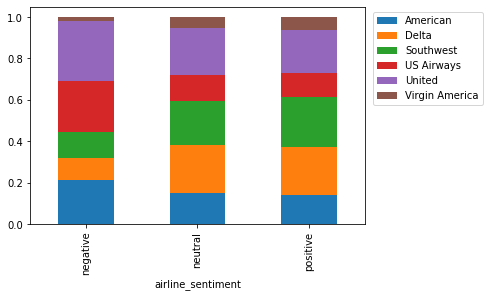

In [18]:
#Split the sentiment labels by airline and plot it
pd.crosstab(data['airline_sentiment'],data['airline'],normalize='index').plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left');

- This shows which airline has more positive, negative and neutral sentiments

- Negative sentiment is more for United, Neutral sentiment is more for Delta and Positive sentiment is more for Southwest

##### Word Cloud based on negativereason

In [19]:
#unique negative reasons
data.negativereason.unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [20]:
#checking value_count for different negative reasons
data.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

- This shows the most common negative reasons like Customer Service Issue,
Late Flight etc.

- There are 9178 non-null negative reasons

In [21]:
#Function to produce word cloud for negativereasons
def show_wordcloud(data, title):
    text = ' '.join(data['negativereason'].astype(str).tolist())                 
    stopwords = set(wordcloud.STOPWORDS)                                  
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

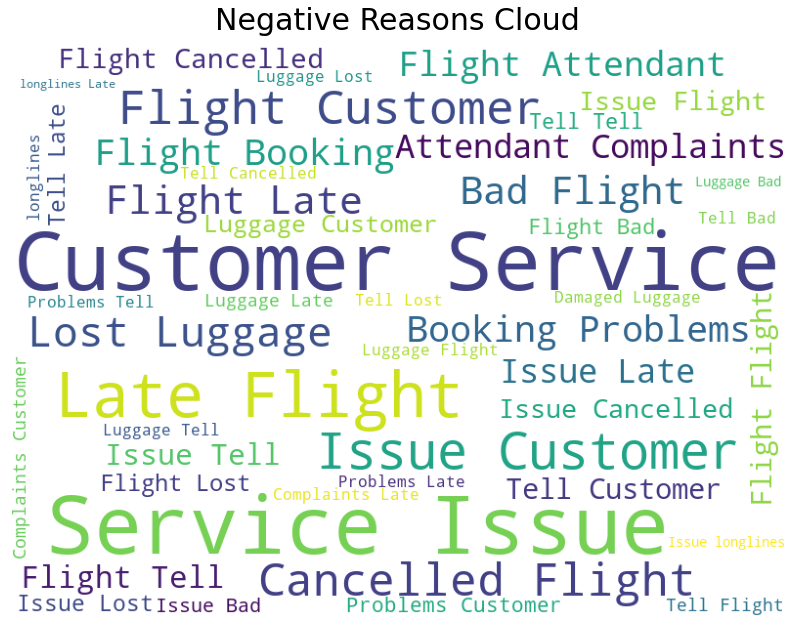

In [22]:
#Show word cloud for negative reasons other than NULL/NaN
show_wordcloud(data[data.negativereason.notnull()],"Negative Reasons Cloud")

- This shows the -ve reasons customers expressed, most frequent negative reasons
- Some of the highlighted -ve reasons are Service Issue, Late Flight, Cancelled Flight, Lost Luggage, Bad Flight, Booking Problems, Attendant Complaints etc.

##### Checking some more insights from the dataset

In [23]:
#Most retweeted tweet
print(data.iloc[data['retweet_count'].idxmax()]['text']) 

@USAirways 5 hr flight delay and a delay when we land . Is that even real life ? Get me off this plane , I wanna go home 👠👠👠 (3 heel clicks)


In [24]:
#Most tweets from which location
data.tweet_location.value_counts()

Boston, MA                    157
New York, NY                  156
Washington, DC                150
New York                      127
USA                           126
                             ... 
The road to glory               1
Seat 3A, Always                 1
www.twitch.tv/sovindictive      1
Long Beach, CA                  1
Somewhere living life....       1
Name: tweet_location, Length: 3081, dtype: int64

In [25]:
#Most tweets from which date
data.tweet_created.str[0:10].value_counts()

2015-02-22    3079
2015-02-23    3028
2015-02-21    1557
2015-02-20    1500
2015-02-17    1408
2015-02-19    1376
2015-02-24    1344
2015-02-18    1344
2015-02-16       4
Name: tweet_created, dtype: int64

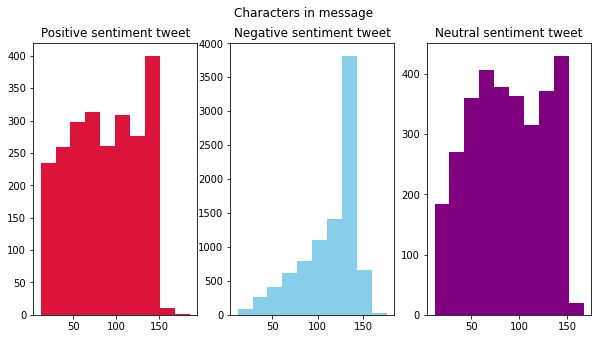

In [26]:
#Number of characters in tweets
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')

tweet_len = data[data['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')

tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.len()
ax3.hist(tweet_len,color='purple')
ax3.set_title('Neutral sentiment tweet')

fig.suptitle('Characters in message');

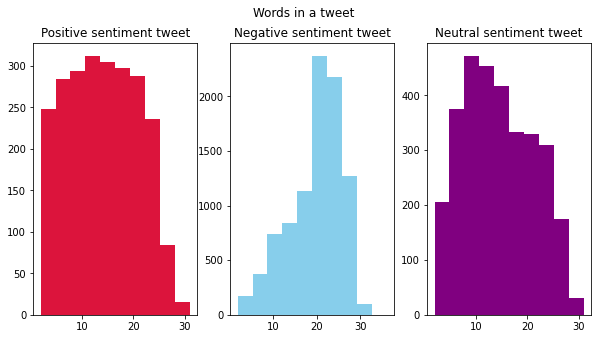

In [27]:
#Number of words in a tweet
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='crimson')
ax1.set_title('Positive sentiment tweet')

tweet_len = data[data['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')

tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='purple')
ax3.set_title('Neutral sentiment tweet')

fig.suptitle('Words in a tweet');

- Number of characters and words seem to be less for -ve sentiment than +ve and neutral

##### **Understand data columns**

In [28]:
#Drop all other columns except "text" and "airline_sentiment"
#Copying columns "text" and "airline_sentiment" to a separate dataset and using that for further analysis, instead of deleting from original data
dataSentiment = data[['text','airline_sentiment']]

In [29]:
#Check the shape of the data
dataSentiment.shape

(14640, 2)

- Now the new dataset has only two columns "text" and "airline_sentiment"
- It has 14640 data rows

In [30]:
#Print the first 5 rows of data
pd.set_option('display.max_colwidth', None)
dataSentiment.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


- Text field has airline name at the start of every text, which is not really part of the text and can be removed later on when we do sentiment analysis

In [31]:
#checking duplicates
dataSentiment.duplicated().sum()

188

- 188 duplicate rows in the new dataset with two columns

In [32]:
#removing duplicate records
dataSentiment.drop_duplicates(inplace=True)

In [33]:
#checking duplicates again to make sure it is removed
dataSentiment.duplicated().sum()

0

- Duplicate records are removed

In [34]:
#checking null or missing values
dataSentiment.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

- There are no null or missing values in both the columns

In [35]:
#shape of data again
dataSentiment.shape

(14452, 2)

##### **Insights based on text and airline_sentiment fields**
  - Sentiment has 3 categories - negative, neutral and positive
  - Negative sentiments are more compared to other two (negative = 63%, neutral = 21% and positive = 16%)

##### **Text pre-processing: Data preparation**

Here are the steps for pre-processing
  - Html tag removal
  - Remove contractions
  - Tokenization
  - Remove the numbers
  - Removal of Special Characters and Punctuations
  - Removal of stopwords
  - Conversion to lowercase
  - Lemmatize or stemming (Lemmatization is better since it creates meaningful words)
  - Join the words in the list to convert back to text string in the data frame(So that each row contains the data in text format)
  - Print the first 5 rows of data after pre-processing

##### HTML tag removal

In [36]:
#Function to remove html tags from text
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

In [37]:
#removing html tag from text column
dataSentiment['text'] = dataSentiment['text'].apply(lambda x: remove_html(x))

In [38]:
#First 5 rows after html tag removal
dataSentiment.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


##### Remove contractions

In [39]:
#Function to remove contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [40]:
#removing contractions from text column
dataSentiment['text'] = dataSentiment['text'].apply(lambda x: replace_contractions(x))

In [41]:
#First 5 rows after html tag removal
dataSentiment.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


##### Remove numbers

In [42]:
#Function to remove numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

In [43]:
#removing numbers from text column
dataSentiment['text'] = dataSentiment['text'].apply(lambda x: remove_numbers(x))

In [44]:
#First 5 rows after html tag removal
dataSentiment.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [45]:
#re.findall(r"(@AmericanAir|@JetBlue|@SouthwestAir|@united|@USAirways|@VirginAmerica)\s", dataSentiment.text[100])

##### Remove http links

In [46]:
#Function to remove http link using Regular Expression
def remove_http(text):
  text = re.sub(r"http\S+", '', text)
  return text

In [47]:
#removing http link from text column
dataSentiment['text'] = dataSentiment['text'].apply(lambda x: remove_http(x))

In [48]:
#First 5 rows after http link removal
dataSentiment.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


##### Remove @airlinename from the beginning of the text

In [49]:
#This is done so that the airline name wont be the most common word in the text corpus
#Function to remove @airlinename using Regular Expression
def remove_airlinename(text):
  text = re.sub(r"(@AmericanAir|@JetBlue|@SouthwestAir|@united|@USAirways|@VirginAmerica)\s", '', text)
  return text

In [50]:
#removing @airlinename from text column
dataSentiment['text'] = dataSentiment['text'].apply(lambda x: remove_airlinename(x))

In [51]:
#First 5 rows after @airlinename removal
dataSentiment.head()

,text,airline_sentiment
0,What @dhepburn said.,neutral
1,plus you have added commercials to the experience... tacky.,positive
2,I did not today... Must mean I need to take another trip!,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,and it is a really big bad thing about it,negative


- Next we will have functions to perform normalize text steps

  - Removal of Special Characters and Punctuations
  - Removal of stopwords
  - Conversion to lowercase
  - Lemmatize

In [52]:
#define stop_words
#since this is sentiment analysis, these words can be removed from stop words, they seem to add to sentiment analysis
stop_words = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'nor','no','few','further',
        'more','most','too','very','against','off','again','than']

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data
stop_words = list(set(stop_words) - set(customlist))   

In [53]:
#Functions for text normalization

#Function to tokenize text and make words
def tokenize_text(text):
  """Tokenize the text and create a list of words"""
  return word_tokenize(text)

#Function to remove non-ascii characters from text
def remove_non_ascii(words):
  """Remove non-ASCII characters from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
  return new_words

#Function to conevrt text to lower case
def to_lowercase(words):
  """Convert all characters to lowercase from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = word.lower()
      new_words.append(new_word)
  return new_words

#Function to remove punctuation from text
def remove_punctuation(words):
  """Remove punctuation from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = re.sub(r'[^\w\s]', '', word)
      if new_word != '':
          new_words.append(new_word)
  return new_words

#Function to remove stop words from text
def remove_stopwords(words):
  """Remove stop words from list of tokenized words"""
  #stop_words = stopwords.words('english')
  # Set custom stop-word's list as not,nor,no since these words matter in Sentiment, so not removing them from original data
  #customlist = ['not','nor','no']
  #stop_words = list(set(stop_words) - set(customlist))
  new_words = []
  for word in words:
      if word not in stop_words:
          new_words.append(word)
  return new_words

#Function to lemmatize words in text
def lemmatize_verbs(words):
  """Lemmatize verbs in list of tokenized words"""
  lemmatizer = WordNetLemmatizer()
  new_words = []
  for word in words:
    new_words.append(lemmatizer.lemmatize(word, pos='v'))
  return new_words

In [54]:
#Normalize text function which calls all the functions defined above
def preprocess_text(text):
  #Tokenize and get the list of words
  words = tokenize_text(text)
  #Remove Punctuations
  words = remove_punctuation(words)
  #Remove Special Characters (non-ascii)
  words = remove_non_ascii(words)
  #Convert to lower case
  words = to_lowercase(words)  
  #Remove stop words
  words = remove_stopwords(words)
  #Lemmatize, since it creates meaningful words
  words = lemmatize_verbs(words)
  #Join words  in the list to convert back to text
  return ' '.join(words)

dataSentiment['text'] = dataSentiment['text'].apply(lambda x: preprocess_text(x))

In [55]:
#First 5 rows after text normalization
dataSentiment.head()

,text,airline_sentiment
0,dhepburn say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


##### Word Cloud for negative, positive, neutral sentiment

In [56]:
#Function to produce word cloud for -ve, +ve and neutral sentiments
def show_sentiment_wordcloud(ds, title):
    text = ' '.join(ds['text'].astype(str).tolist())                 
    stopwords = set(wordcloud.STOPWORDS) 
    #Airline names are excluded from the word cloud to highlight other words
    #airline_names = set(['virginamerica','unite','united','southwestair','jetblue','americanair','usairways'])
    #stopwords.update(airline_names)                                
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

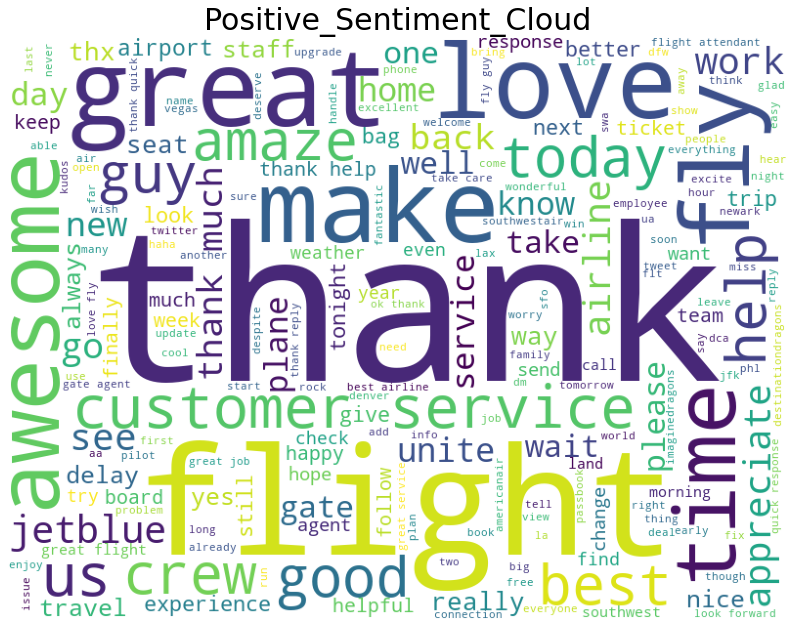

In [57]:
#Word cloud for +ve sentiments
show_sentiment_wordcloud(dataSentiment[dataSentiment.airline_sentiment == 'positive'],'Positive_Sentiment_Cloud')

- Words like "thank", "happy", "love", "great", "awesome", "best", "appreciate" highlighted in positive sentiment tweets.

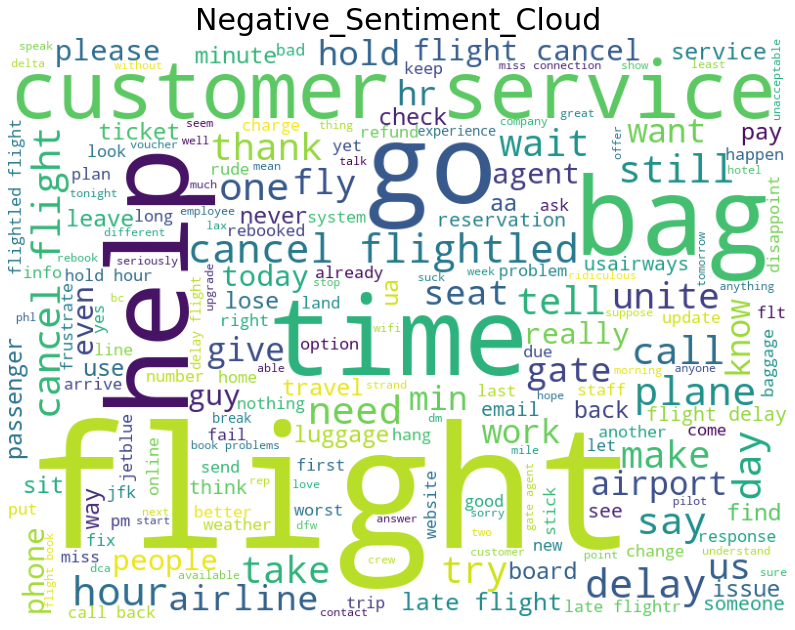

In [58]:
#Word cloud for -ve sentiments
show_sentiment_wordcloud(dataSentiment[dataSentiment.airline_sentiment == 'negative'],'Negative_Sentiment_Cloud')

- Word like "delay", "cancel flight", "late flight", "frustrate", "wait", "ridiculous", "delay flight" highlighted in negative sentiment tweets.

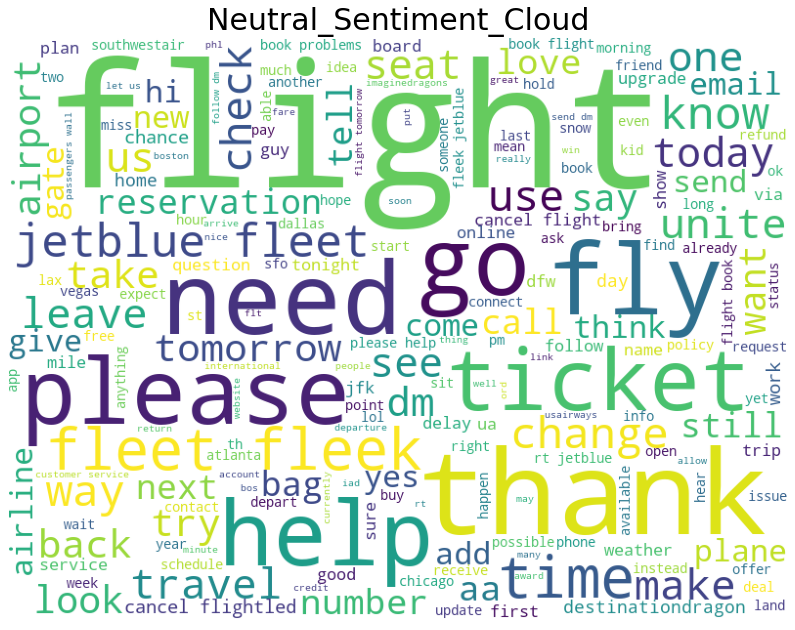

In [59]:
#Word cloud for neutral sentiments
show_sentiment_wordcloud(dataSentiment[dataSentiment.airline_sentiment == 'neutral'],'Neutral_Sentiment_Cloud')

- Word like "upgrade","please", "reservation", "ticket" highlighted in neutral sentiment tweets.

##### **The most Common words in text column**

- From the word clouds, we can see that words like 'flight' is used more frequent, but it is not going to add to the sentiment analysis
- Also words that are very rarely used can be removed from the analysis

In [60]:
#dataset 5 rows
dataSentiment.head()

,text,airline_sentiment
0,dhepburn say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


In [61]:
#words from text field of the dataset
words = dataSentiment['text'].apply(lambda x: tokenize_text(x))
words

0                                                                                                    [dhepburn, say]
1                                                                        [plus, add, commercials, experience, tacky]
2                                                                [not, today, must, mean, need, take, another, trip]
3                              [really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]
4                                                                                          [really, big, bad, thing]
                                                            ...                                                     
14635                                                                       [thank, get, different, flight, chicago]
14636    [leave, minutes, late, flight, no, warn, communication, minutes, late, flight, call, shitty, customer, svc]
14637                                                           

In [62]:
#Most common 20 words from the text column
top = Counter([item for sublist in words for item in sublist])
freq = pd.DataFrame(top.most_common()[:20])
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,flight,4784
1,not,3862
2,get,2098
3,thank,1626
4,no,1466
5,cancel,1037
6,service,989
7,delay,982
8,time,945
9,help,945


In [63]:
#Least common 20 words from the text column
freq = pd.DataFrame(top.most_common()[-20:])
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,disconnections,1
1,chewey,1
2,oatmeal,1
3,cst,1
4,golden,1
5,custy,1
6,pvr,1
7,shannonbloom,1
8,duck,1
9,roberts,1


In [64]:
#words that are used less than 5 time
freq = pd.DataFrame(top.most_common())
freq.columns = ['Common_words','count']
freq[freq['count'] < 5]['Common_words'].unique().shape

(8559,)

In [65]:
#Function to remove least and most frequent words
def remove_least_most_words(text):
  """Remove least and most frequent words from list of tokenized words"""
  words = tokenize_text(text)
  words_to_remove = []
  #removing words that are used less than 5 times
  words_to_remove = list(freq[freq['count'] < 5]['Common_words'].unique())
  #flight is the most commonly used word and is not adding to the sentiment, so removing
  words_to_remove.append('flight')
  new_words = []
  for word in words:
      if word not in words_to_remove:
          new_words.append(word)
  return ' '.join(new_words)

In [66]:
#remove least and most frequent words from the text column of the dataset
dataSentiment['text'] = dataSentiment['text'].apply(lambda x: remove_least_most_words(x))

In [67]:
#first 5 rows after removing words from above analysis
dataSentiment.head()

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience,positive
2,not today must mean need take another trip,neutral
3,really blast entertainment face little recourse,negative
4,really big bad thing,negative


##### **Label Encoding sentiments**

In [68]:
label_encoder = preprocessing.LabelEncoder()
dataSentiment['airline_sentiment'] = label_encoder.fit_transform(dataSentiment['airline_sentiment'])
labels = dataSentiment['airline_sentiment'] 

In [69]:
#To know how negative,positive and neutral are encoded
#these are encoded as negative = 0, neutral = 1, positive = 2
print(label_encoder.inverse_transform([0, 1, 2]))

['negative' 'neutral' 'positive']


##### **Building the model based on CountVectorizer and Random Forest**

In [70]:
#Keep only 2000 features as number of features will increase the processing time
count_vect = CountVectorizer(max_features=2000)

#Count Vectorization (Convert text data to numbers)
data_features = count_vect.fit_transform(dataSentiment['text'])

# Convert the data features to array
data_features = data_features.toarray()                        

In [71]:
#shape of document term matrix after count vectorization
data_features.shape

(14452, 2000)

In [72]:
#making data type of labels as integer
labels = labels.astype('int')

In [73]:
#shape of labels
labels.shape

(14452,)

In [74]:
#define X and y
X = data_features
y = labels

In [75]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [76]:
#shape of x and y datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10116, 2000)
(4336, 2000)
(10116,)
(4336,)


In [77]:
#Compure class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5301053293507311, 1: 1.5705635770843036, 2: 2.0970149253731343}

In [78]:
# Using Random Forest to build model for the classification of tweets
# Also calculating the cross validation score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4,class_weight=class_weights)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5301053293507311,
                                     1: 1.5705635770843036,
                                     2: 2.0970149253731343},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7543491944343447


##### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [79]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1,25)]

#K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,class_weight=class_weights)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

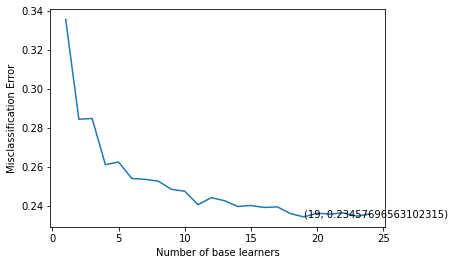

In [80]:
#plotting the error as k increases
#error corresponds to each nu of estimator
error = [1 - x for x in cv_scores]
#Selection of optimal nu of n_estimator corresponds to minimum error                             
optimal_learners = base_ln[error.index(min(error))]
#Plot between each nu of estimator and misclassification error             
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [81]:
# Training the best model and calculating accuracy on test data
clf = RandomForestClassifier(n_estimators = optimal_learners,class_weight=class_weights)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7440036900369004

In [82]:
#prediction on test data
y_pred =  clf.predict(X_test)  

[[2369  233  124]
 [ 344  433  143]
 [ 174   92  424]]
0.7440036900369004


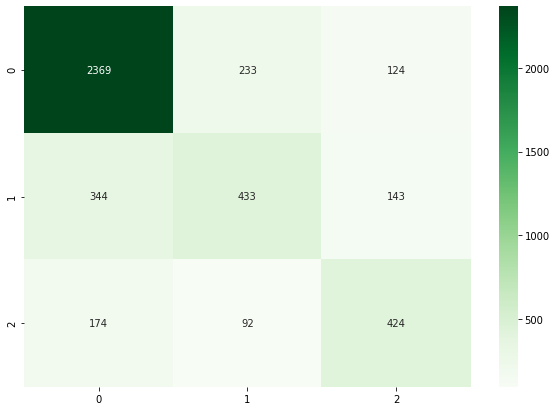

In [83]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

#saving the score for compare at the end
f1_test = metrics.f1_score(y_test, y_pred, average='micro')

print(f1_test)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',cmap=plt.cm.Greens);

- Here 0 is -ve class, 1 is neutral and 2 is positive class
- This model is able to identify -ve sentiment class better than +ve and neutral and gives f1 score of 74% 

##### Creating a dataframe to store the scores of different models for compare

In [84]:
#dataframe for comparing scores of diff models
df_compare = pd.DataFrame(
                            {                          
                            'Model': ['RF-CountVectorizer'], 
                            'Test_f1score': [f1_test]
                            }
                        ) 

##### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

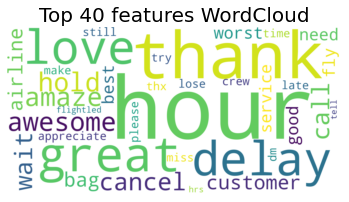

In [85]:
#Instantiate the feature from the vectorizer
all_features = count_vect.get_feature_names()              
#Addition of top 40 feature into top_feature after training the model
top_features=''                                           
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

#Show word cloud for top 40 features
word_cloud = wordcloud.WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(word_cloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

- Words highlighted in top 40 features word cloud are wait,delay,thank,hold,hour,love,great,cancel,worst etc

##### **Building the model based on TF-IDF Vectorizer and Random Forest**

In [86]:
# Using TfidfVectorizer to convert text data to numbers
tfidf_vect = TfidfVectorizer(max_features=2000)
data_features = tfidf_vect.fit_transform(dataSentiment['text'])

# Convert the data features to array
data_features = data_features.toarray()

In [87]:
#shape of document term matrix after TF-IDF vectorization
data_features.shape

(14452, 2000)

In [88]:
#shape of labels
labels.shape

(14452,)

In [89]:
#define X and y
X = data_features
y = labels

In [90]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [91]:
#shape of x and y datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10116, 2000)
(4336, 2000)
(10116,)
(4336,)


In [92]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
forest = RandomForestClassifier(n_estimators=10, n_jobs=4,class_weight=class_weights)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5301053293507311,
                                     1: 1.5705635770843036,
                                     2: 2.0970149253731343},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7661122904962409


##### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [93]:
# Finding optimal number of base learners using k-fold CV ->
#K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,class_weight=class_weights)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

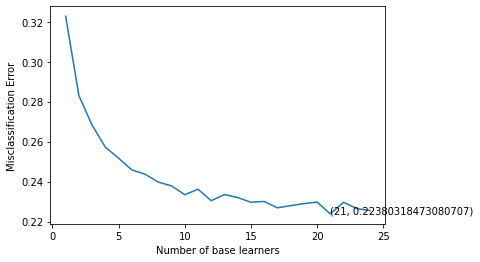

In [94]:
#plotting the error as k increases
#error corresponds to each nu of estimator
error = [1 - x for x in cv_scores]
#Selection of optimal nu of n_estimator corresponds to minimum error                             
optimal_learners = base_ln[error.index(min(error))]
#Plot between each nu of estimator and misclassification error             
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [95]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners,class_weight=class_weights)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7569188191881919

In [96]:
#predictions from test data
y_pred = clf.predict(X_test)

[[2428  214   84]
 [ 361  459  100]
 [ 198   97  395]]
0.7569188191881919


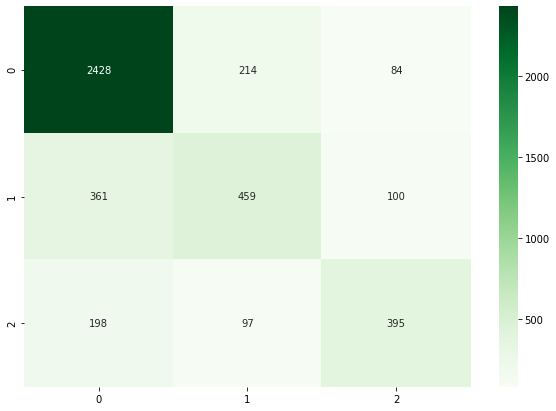

In [97]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

#saving the score for compare at the end
f1_test = metrics.f1_score(y_test, y_pred, average='micro')

print(f1_test)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',cmap=plt.cm.Greens);

- Here 0 is -ve class, 1 is neutral and 2 is positive class
- This model is able to identify -ve sentiment class better than +ve and neutral and gives f1 score of 75% 

In [98]:
#dataframe for comparing scores of diff models
df_compare = df_compare.append({'Model': 'RF-TFIDFVectorizer', 'Test_f1score': f1_test}, ignore_index=True)

##### **Word Cloud of top 40 important features from the TfIdfVectorizer + Random Forest based model**

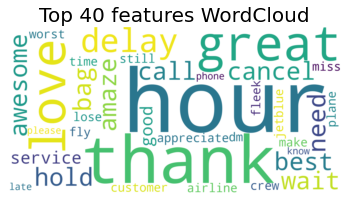

In [99]:
#Instantiate the feature from the vectorizer
all_features = tfidf_vect.get_feature_names()              
#Addition of top 40 feature into top_feature after training the model
top_features=''                                           
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

#Show word cloud for top 40 features
word_cloud = wordcloud.WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(word_cloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

- Words highlighted in top 40 features word cloud are great,love,hour,thank,hold,delay,cancel etc

##### **Building the model based on CountVectorizer and Random Forest - N-grams**

In [100]:
#Keep only 2000 features as number of features will increase the processing time
count_vect = CountVectorizer(ngram_range=(1,3),max_features=3000)

#Count Vectorization (Convert text data to numbers)
data_features = count_vect.fit_transform(dataSentiment['text'])

# Convert the data features to array
data_features = data_features.toarray()  

In [101]:
#shape of document term matrix after count vectorization
data_features.shape

(14452, 3000)

In [102]:
#shape of labels
labels.shape

(14452,)

In [103]:
#define X and y
X = data_features
y = labels

In [104]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [105]:
#shape of x and y datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10116, 3000)
(4336, 3000)
(10116,)
(4336,)


In [106]:
# Using Random Forest to build model for the classification of tweets
# Also calculating the cross validation score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4,class_weight=class_weights)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5301053293507311,
                                     1: 1.5705635770843036,
                                     2: 2.0970149253731343},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7547463083942247


##### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [107]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

#K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,class_weight=class_weights)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

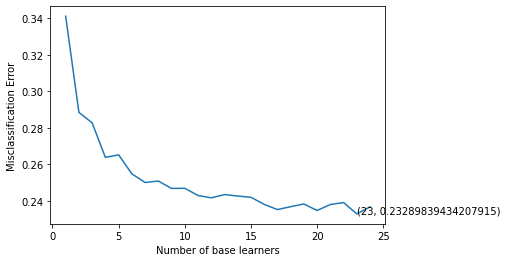

In [108]:
#plotting the error as k increases
#error corresponds to each nu of estimator
error = [1 - x for x in cv_scores]
#Selection of optimal nu of n_estimator corresponds to minimum error                             
optimal_learners = base_ln[error.index(min(error))]
#Plot between each nu of estimator and misclassification error             
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [109]:
# Training the best model and calculating accuracy on test data
clf = RandomForestClassifier(n_estimators = optimal_learners,class_weight=class_weights)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7497693726937269

In [110]:
#prediction on test data
y_pred =  clf.predict(X_test)  

[[2389  223  114]
 [ 354  434  132]
 [ 160  102  428]]
0.7497693726937268


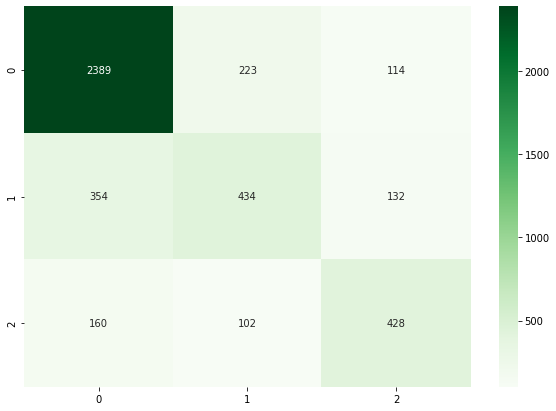

In [111]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

#saving the score for compare at the end
f1_test = metrics.f1_score(y_test, y_pred, average='micro')

print(f1_test)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',cmap=plt.cm.Greens);

- Here 0 is -ve class, 1 is neutral and 2 is positive class
- This model using N-grams (range of 1 to 3) is able to identify -ve sentiment class better than +ve and neutral and gives f1 score of 75% 

In [112]:
#dataframe for comparing scores of diff models
df_compare = df_compare.append({'Model': 'RF-CountVectorizer-Ngrams', 'Test_f1score': f1_test}, ignore_index=True)

##### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model using N-grams**

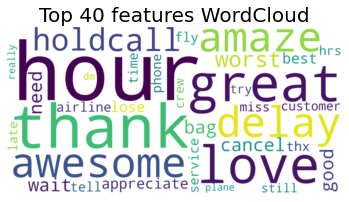

In [113]:
#Instantiate the feature from the vectorizer
all_features = count_vect.get_feature_names()              
#Addition of top 40 feature into top_feature after training the model
top_features=''                                           
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

#Show word cloud for top 40 features
word_cloud = wordcloud.WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(word_cloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

- Words highlighted in top 40 features word cloud are great,love,hour,thank,hold,delay,cancel,awesome etc

##### **Building the model based on TF-IDF Vectorizer and Random Forest - N-grams**

In [114]:
# Using TfidfVectorizer to convert text data to numbers
tfidf_vect = TfidfVectorizer(ngram_range=(1,3),max_features=3000)
data_features = tfidf_vect.fit_transform(dataSentiment['text'])

# Convert the data features to array
data_features = data_features.toarray()

In [115]:
#shape of document term matrix after TF-IDF vectorization
data_features.shape

(14452, 3000)

In [116]:
#shape of labels
labels.shape

(14452,)

In [117]:
#define X and y
X = data_features
y = labels

In [118]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [119]:
#shape of x and y datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10116, 3000)
(4336, 3000)
(10116,)
(4336,)


In [120]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
forest = RandomForestClassifier(n_estimators=10, n_jobs=4,class_weight=class_weights)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5301053293507311,
                                     1: 1.5705635770843036,
                                     2: 2.0970149253731343},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7641375697368472


##### **Optimizing the parameter: Number of trees in the random forest model(n_estimators) - N-grams**

In [121]:
# Finding optimal number of base learners using k-fold CV ->
#K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b,class_weight=class_weights)
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

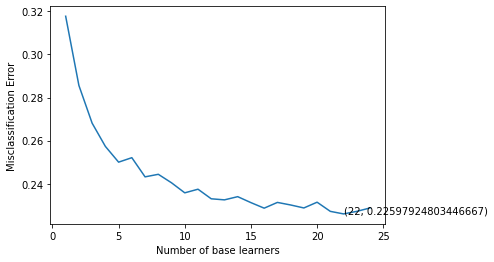

In [122]:
#plotting the error as k increases
#error corresponds to each nu of estimator
error = [1 - x for x in cv_scores]
#Selection of optimal nu of n_estimator corresponds to minimum error                             
optimal_learners = base_ln[error.index(min(error))]
#Plot between each nu of estimator and misclassification error             
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [123]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners,class_weight=class_weights)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7626845018450185

In [124]:
#predictions from test data
y_pred = clf.predict(X_test)

[[2437  213   76]
 [ 350  472   98]
 [ 194   98  398]]
0.7626845018450185


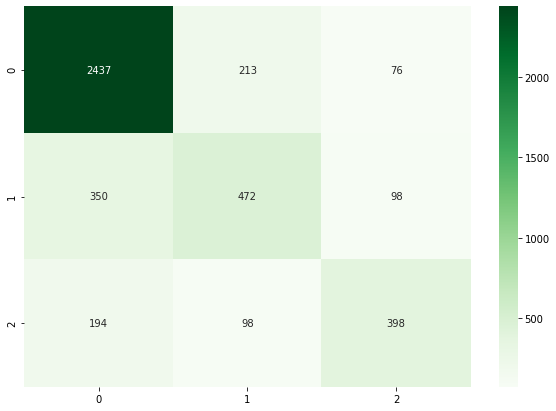

In [125]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

#saving the score for compare at the end
f1_test = metrics.f1_score(y_test, y_pred, average='micro')

print(f1_test)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',cmap=plt.cm.Greens);

- Here 0 is -ve class, 1 is neutral and 2 is positive class
- This model is able to identify -ve sentiment class better than +ve and neutral and gives f1 score of 76% 

In [126]:
#dataframe for comparing scores of diff models
df_compare = df_compare.append({'Model': 'RF-TFIDFVectorizer-Ngrams', 'Test_f1score': f1_test}, ignore_index=True)

##### **Word Cloud of top 40 important features from the TfIdfVectorizer + Random Forest based model**

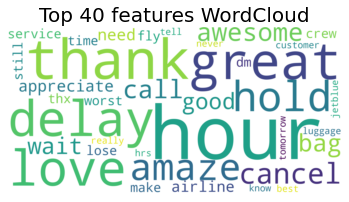

In [127]:
#Instantiate the feature from the vectorizer
all_features = tfidf_vect.get_feature_names()              
#Addition of top 40 feature into top_feature after training the model
top_features=''                                           
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

#Show word cloud for top 40 features
word_cloud = wordcloud.WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(word_cloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

- Words highlighted in top 40 features word cloud are great,love,hour,thank,hold,delay,cancel,awesome etc

##### **Neural Network model for classification with SMOTE oversampling**

- Since -ve class is having double the number of data points compared to +ve and neutral, trying to oversample minority classes and then building Neural Network for classification

In [128]:
# Using TfidfVectorizer to convert text data to numbers
tfidf_vect = TfidfVectorizer(max_features=2000)
data_features = tfidf_vect.fit_transform(dataSentiment['text'])

# Convert the data features to array
data_features = data_features.toarray()

In [129]:
#shape of document term matrix after count vectorization
data_features.shape

(14452, 2000)

In [130]:
#shape of labels
labels.shape

(14452,)

In [131]:
#define X and y
X = data_features
y = labels

In [132]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [133]:
#shape of x and y datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10116, 2000)
(4336, 2000)
(10116,)
(4336,)


In [134]:
#Oversampling X and y train using SMOTE
print("Before UpSampling, counts of label 'Negative': {}".format(sum(y_train==0)))
print("Before UpSampling, counts of label 'Neutral': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'Positive': {} \n".format(sum(y_train==2)))

#SMOTE oversampling
sm = SMOTE()
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Negative': {}".format(sum(y_train_over==0)))
print("After UpSampling, counts of label 'Neutral': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'Positive': {} \n".format(sum(y_train_over==2)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Negative': 6361
Before UpSampling, counts of label 'Neutral': 2147
Before UpSampling, counts of label 'Positive': 1608 

After UpSampling, counts of label 'Negative': 6361
After UpSampling, counts of label 'Neutral': 6361
After UpSampling, counts of label 'Positive': 6361 

After UpSampling, the shape of train_X: (19083, 2000)
After UpSampling, the shape of train_y: (19083,) 



In [135]:
#convert y_train and y_test to categorical
y_train_over = to_categorical(y_train_over, 3)
y_test = to_categorical(y_test, 3)

In [136]:
#initialize the model
classifier = Sequential()

In [137]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2000, kernel_regularizer = l2(0.001), bias_regularizer =l2(0.001) ,activation = 'relu', input_dim = X_train_over.shape[1]))

#Adding Dropout to prevent overfitting 
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 1000, kernel_regularizer = l2(0.001), bias_regularizer =l2(0.001) ,activation = 'relu'))

#Adding Dropout to prevent overfitting 
classifier.add(Dropout(0.2))

# Adding the 3rd hidden layer
classifier.add(Dense(units = 500, kernel_regularizer = l2(0.001), bias_regularizer =l2(0.001) ,activation = 'relu'))

#Adding Dropout to prevent overfitting 
classifier.add(Dropout(0.3))

# Adding the 4th hidden layer
classifier.add(Dense(units = 250, kernel_regularizer = l2(0.001), bias_regularizer =l2(0.001) ,activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 3, kernel_regularizer = l2(0.001), bias_regularizer =l2(0.001) ,activation = 'softmax'))

In [138]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [139]:
# Compiling the ANN
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [140]:
#This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced 
#Reduce learning rate by a factor of 0.2 when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.00001)

In [141]:
#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('seedling_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [142]:
# Fitting the ANN to the Training set
classifier.fit(X_train_over, y_train_over, batch_size =100 , epochs = 50, validation_split=0.2,verbose=1,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/50
153/153 [==============================] - 5s 10ms/step - loss: 1.3266 - precision: 0.7980 - recall: 0.6775 - val_loss: 1.1605 - val_precision: 0.6140 - val_recall: 0.5580

Epoch 00001: val_loss improved from inf to 1.16050, saving model to seedling_cnn_checkpoint_01_loss1.1605.h5
Epoch 2/50
153/153 [==============================] - 1s 7ms/step - loss: 0.6777 - precision: 0.8557 - recall: 0.8313 - val_loss: 0.6917 - val_precision: 0.8151 - val_recall: 0.7854

Epoch 00002: val_loss improved from 1.16050 to 0.69167, saving model to seedling_cnn_checkpoint_02_loss0.6917.h5
Epoch 3/50
153/153 [==============================] - 1s 7ms/step - loss: 0.6100 - precision: 0.8775 - recall: 0.8592 - val_loss: 0.7530 - val_precision: 0.7786 - val_recall: 0.7574

Epoch 00003: val_loss did not improve from 0.69167
Epoch 4/50
153/153 [==============================] - 1s 8ms/step - loss: 0.5498 - precision: 0.9067 - recall: 0.8934 - val_loss: 0.9806 - val_precision: 0.6928 - val_recall: 0.

In [143]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [144]:
# Making the Confusion Matrix
#getting the argmax value 
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

[[2365  253  108]
 [ 301  494  125]
 [ 120  121  449]]
0.7629151291512916


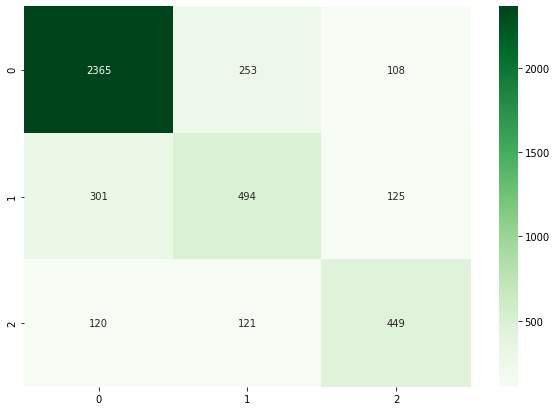

In [145]:
#show confusion matrix
print(cm)

#saving the score for compare at the end
f1_test = metrics.f1_score(y_true, y_pred, average='micro')

print(f1_test)

df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g',cmap=plt.cm.Greens);

- Here 0 is -ve class, 1 is neutral and 2 is positive class
- This model is able to identify -ve sentiment class better than +ve and neutral and gives f1 score of 76% 

In [146]:
#dataframe for comparing scores of diff models
df_compare = df_compare.append({'Model': 'NN-TFIDFVectorizer-Smote', 'Test_f1score': f1_test}, ignore_index=True)

##### **Summary**

- Comparing the performance of different models

In [147]:
#print the compare dataset that shows f1-score for different models
df_compare

,Model,Test_f1score
0,RF-CountVectorizer,0.744004
1,RF-TFIDFVectorizer,0.756919
2,RF-CountVectorizer-Ngrams,0.749769
3,RF-TFIDFVectorizer-Ngrams,0.762685
4,NN-TFIDFVectorizer-Smote,0.762915


##### Performance of different models

  - We have built following 5 models and the calculated the f1 score for each of the models
      - Random Forest using Count Vectorizer
      - Random Forest using TFIDF Vectorizer
      - Random Forest using Count Vectorizer and N-grams
      - Random Forest using TFIDF Vectorizer and N-grams
      - Neural Network model using oversampling and TFIDF Vectorizer
  - All these models give more or less similar f1 scores, but "Neural Network with TF-IDF Vectorizer and SMOTE" gives slightly better score than others

##### Summary

- We loaded the dataset which has 14640 records and 15 columns
- We did intial analysis by checking nulls in the dataset, duplicate records, dataset summary and info
- We checked % of -ve,+ve and neutral sentiments in the dataset. Found that -ve sentiments are way more (63%) than +ve (16%) and neutral (21%)
- We checked how the sentiments are distributed between different airlines. Found that United has got more -ve sentiments, 
    Delta has got more neutral sentiments and Southwest has got more +ve sentiments
- We plotted **negative reason word cloud** to see the common words used in -ve reasons provided by customers
- Then for the sentiment analysis we chose two fields from the dataset **text and airline_sentiment**
- 'airline_sentiment' is the target label for our model and 'text' is the field used for sentiment analysis (based on the words used in text field
    our model is supposed to classify it as +ve or -ve or neutral sentiment)
- We **pre-processed the data in text field** using following techniques
    - html tags removed
    - contractions removed and expanded the words (example: isn't expanded to is not)
    - numbers removed from text
    - http links removed
    - @airlinename was present at the beginning of each text and that is removed (it is not going to help sentiment analysis)
    - text tokenized to words
    - non-ascii characters removed
    - converted text to lower case
    - special characters and punctuations removed
    - stop words removed
    - performed lemmatization on words
    - most common words and least used words identified, 'flight' was the most common word and is removed, words that are used less than 5 times removed
- We created **+ve sentiment word cloud, -ve sentiment word cloud and neutral sentiment word cloud**
- The pre-processed text is converted to numbers (using **vectorization**), so that we can feed the data into the model
- Used both **Count Vectorizer** and **TF-IDF Vectorizer**, found that TF-IDF Vectorizer gives slightly better performance
- We trained the models and optimized the parameters to see if that gives better performance
- We have built 5 **models for text-classification** and saw that "Neural Netwok using TFIDF Vectorizer and SMOTE" gives the highest score
- While building the models, we used **class_weight** since the 3 target classes are imbalanced, tried **SMOTE** to oversample the minority classes,
    tried using **N-grams** in vectorizers, **cross valiadation** is performed to evaluate the models and plotted **confusion matrix** to see how the
    target classes are predicted with respect to each other
- After building the classification models, we **predicted the results for the test data**
- These models perform well, however, **we can still increase the accuracy of our model by increasing the dataset we took into account 
    for the model building, increasing the max_feature parameter in the vectorizer, using hyperparameter tuning techniques** etc.
- Removing neutral sentiment text from the dataset may improve the prediction of +ve and -ve sentiments, but in this context 
    our goal is to predict all three categories (+ve,-ve and neutral)
- Removing proper nouns from the text might also increase the overall accuracy even further
- Identifying more custom words that helps in sentiment analysis and remove them from stop words list also might help